# Unsupervised Learning Project: Credit Card Customer Segmentation

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h2><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h2>
<h2><center> Unsupervised Learning Project: Credit Card Customer Segmentation </center></h2>
<h3><center> <i>By Vaibhav Pradhan</i> </center></h3>

  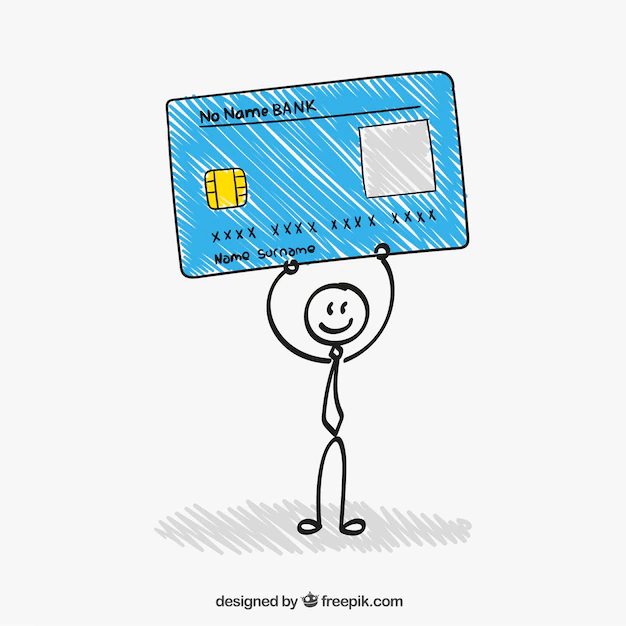

<center><h1>Unsupervised Learning Project: Credit Card Customer Segmentation</h1><center>

## Problem Statement

### Context


AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help


### Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


###  Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

**Data Dictionary**

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Importing necessary libraries and data

### Import Libraries

In [53]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

### Import Data

In [54]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

url = "/content/drive/MyDrive/PGP-AIML/Project4/data/CreditCardCustomerData.xlsx"
data = pd.read_excel(url)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

### Checking the shape of the dataset

In [55]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 660 rows and 7 columns.


### Displaying few rows of the dataset

In [56]:
# viewing the first 5 rows of the data
data.head()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Creating a copy of original data

In [57]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [58]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

### Checking the data types of the columns for the dataset

In [59]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**All columns in the dataset are numeric**

### Checking the missing values

In [60]:
# checking for missing values
df.isnull().sum()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

**There are no missing values**

In [61]:
# checking the number of unique values in each column
data.nunique()

Sl_No                  660
Customer_Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

**There are no missing values detected so no imputation is needed**

### Statistical summary of the dataset

In [62]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer_Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


- Sl_No and Customer_key are identifiers for the records hence are not useful for analysis
- Avg_credit_limit has different range of values compared to other columns hence the data will need to be scaled
- Avg_credit_limit varies from 3k to 30K with a mean of ~34.5K which indicates data would be right skewed

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [63]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [64]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

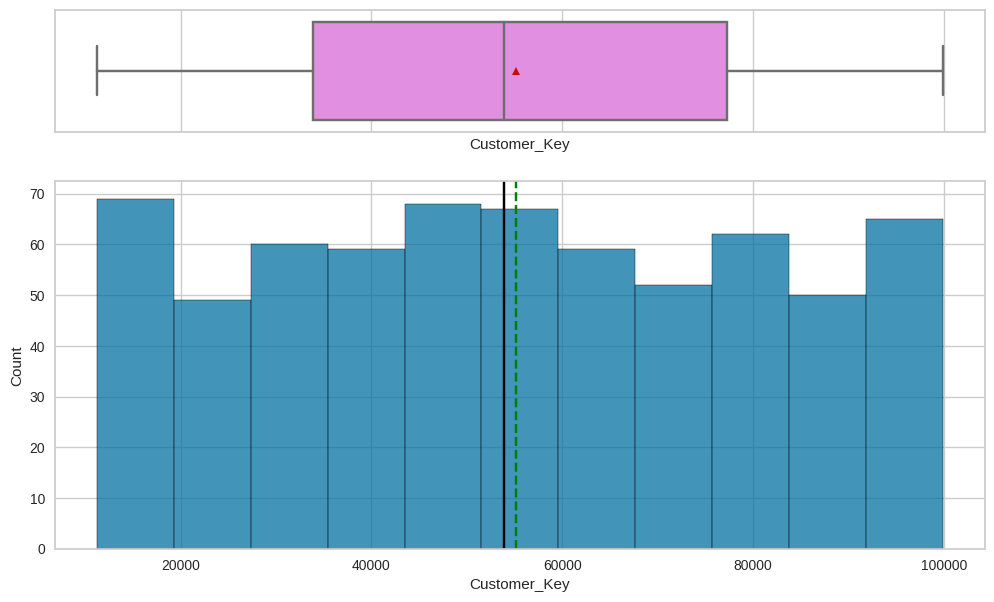

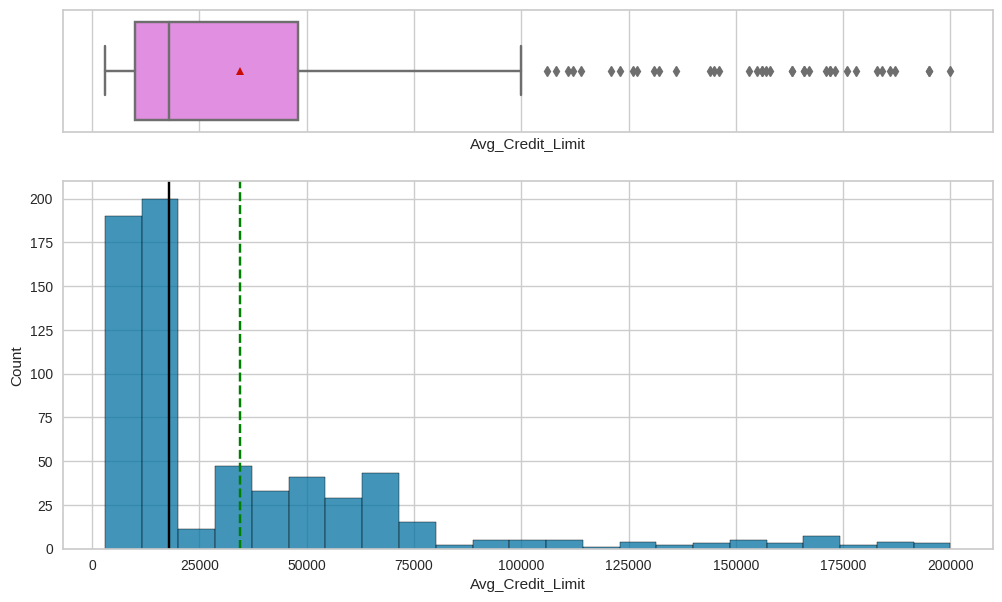

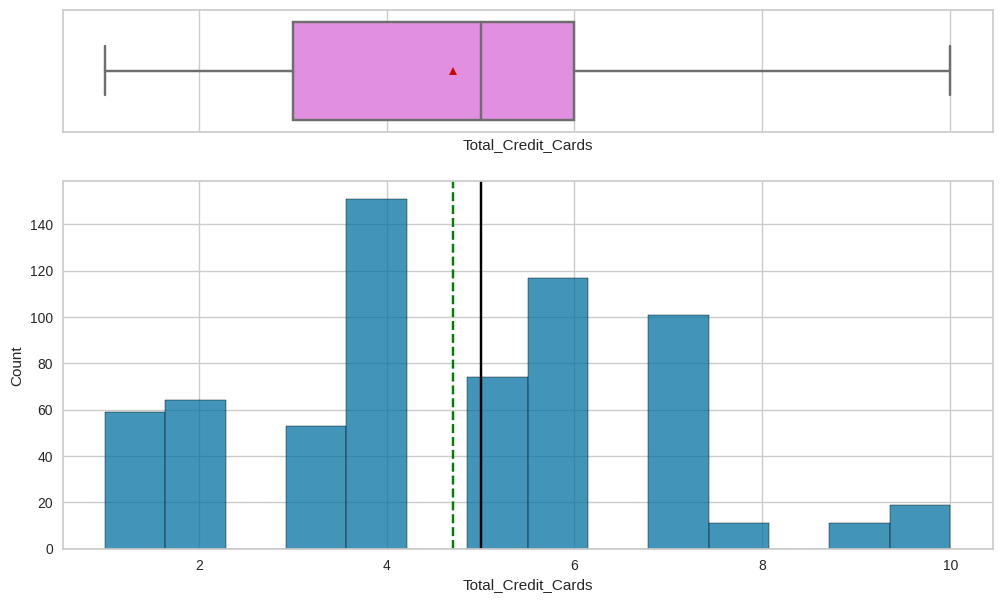

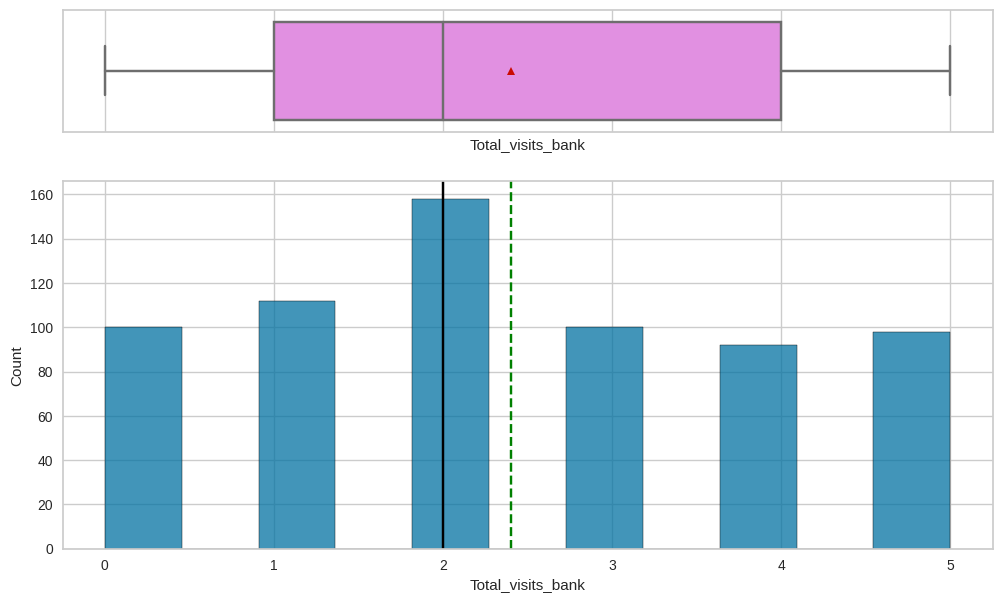

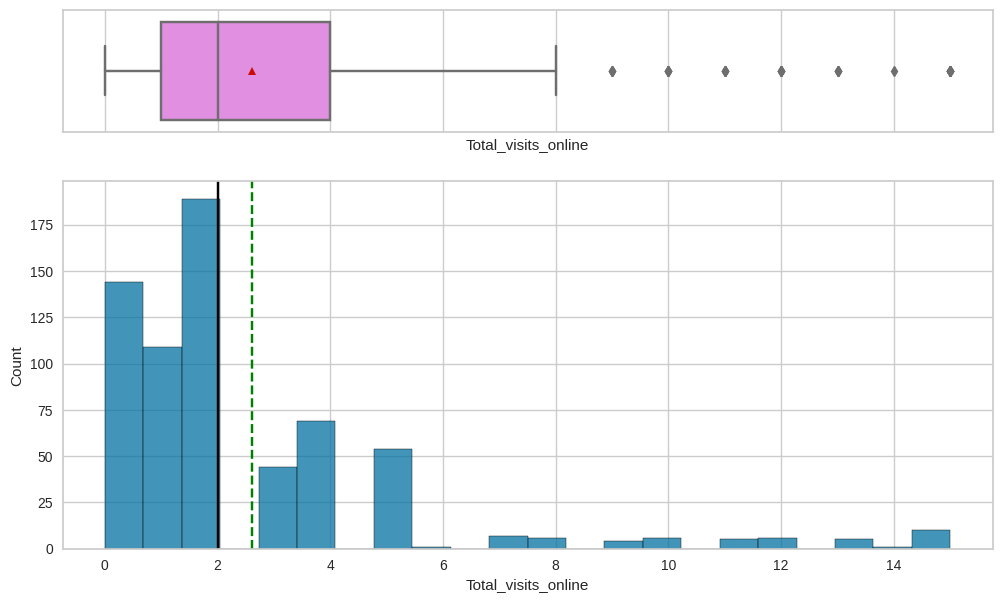

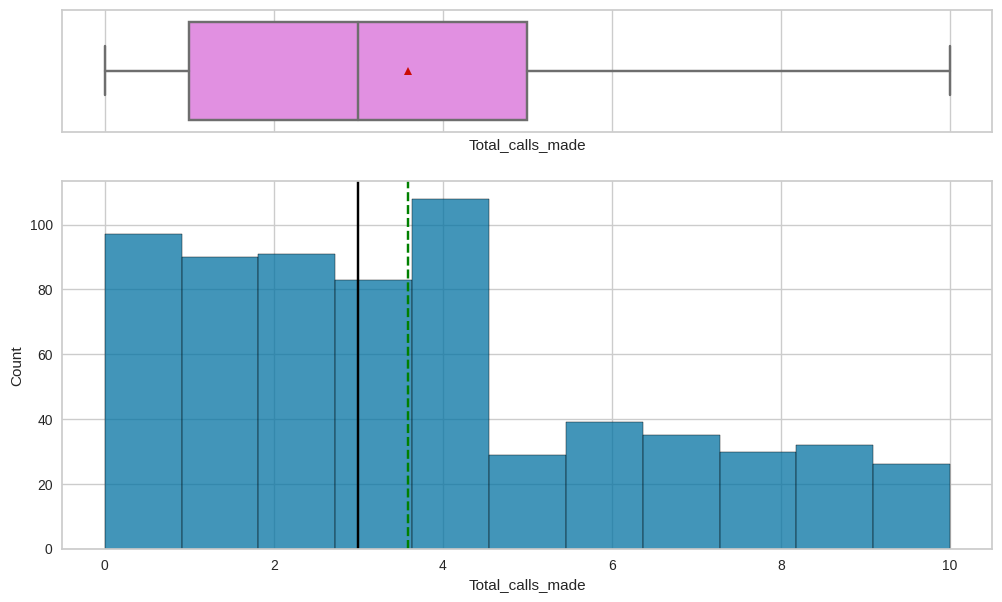

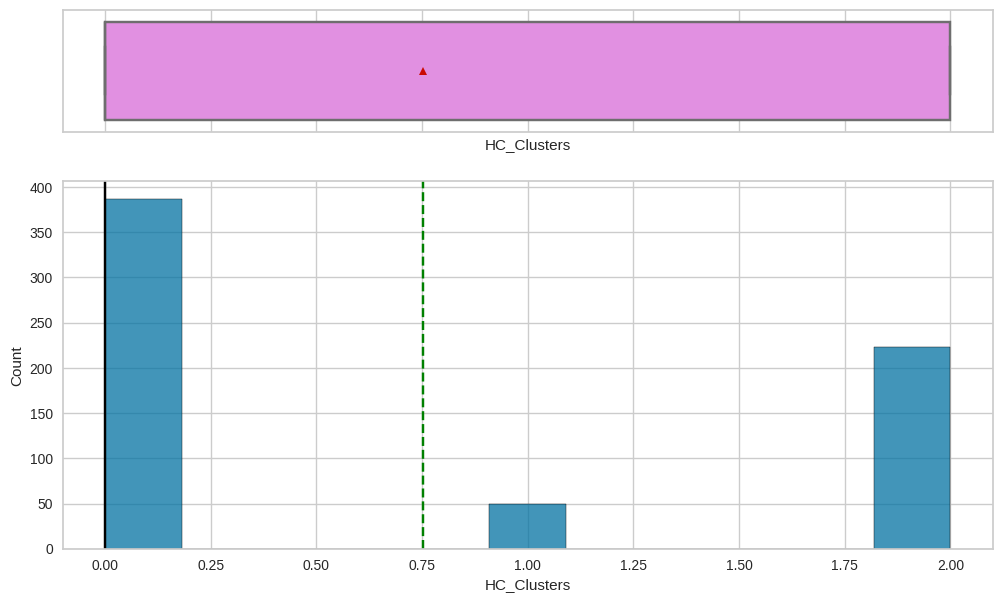

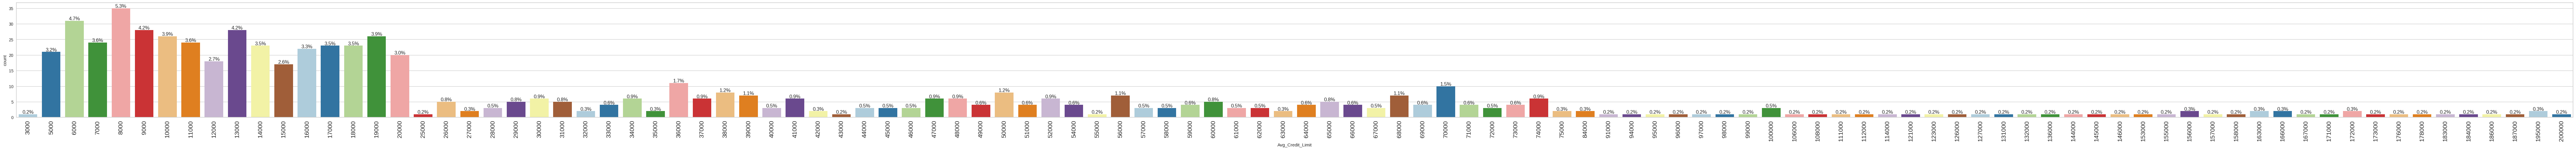

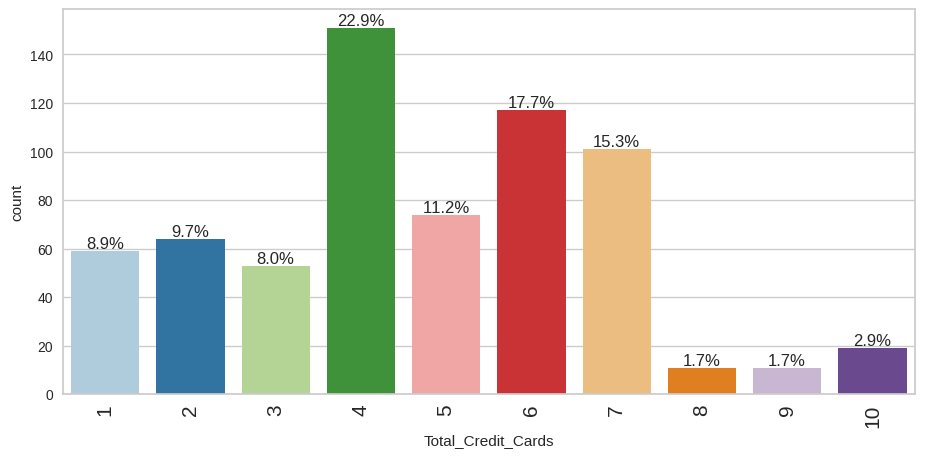

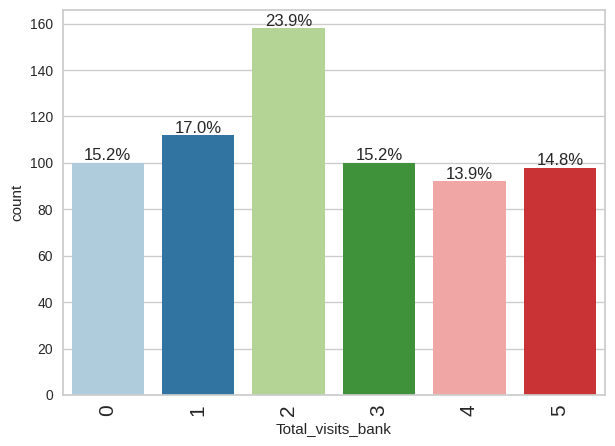

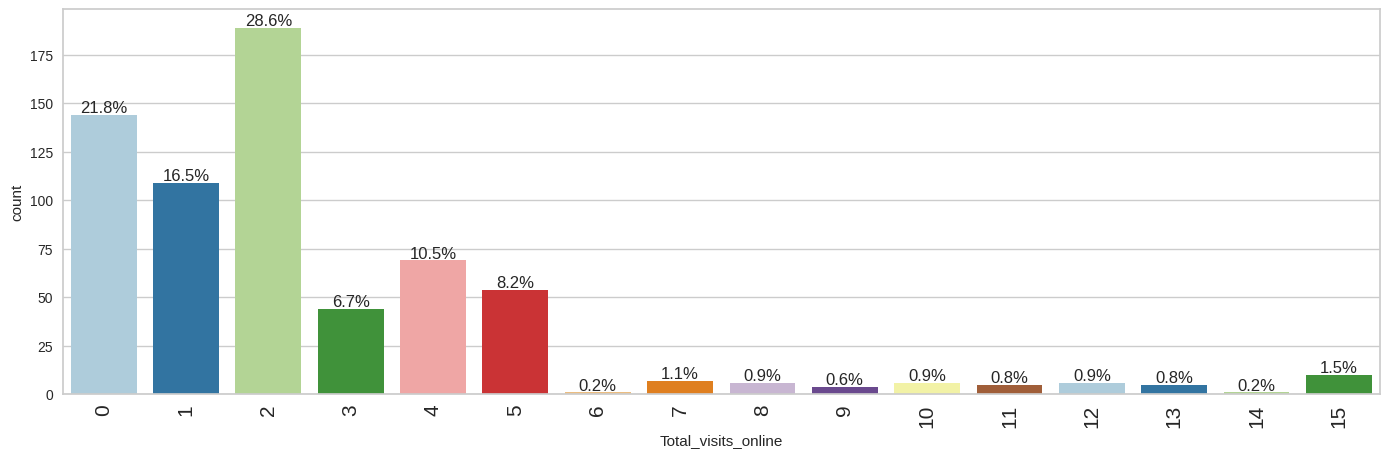

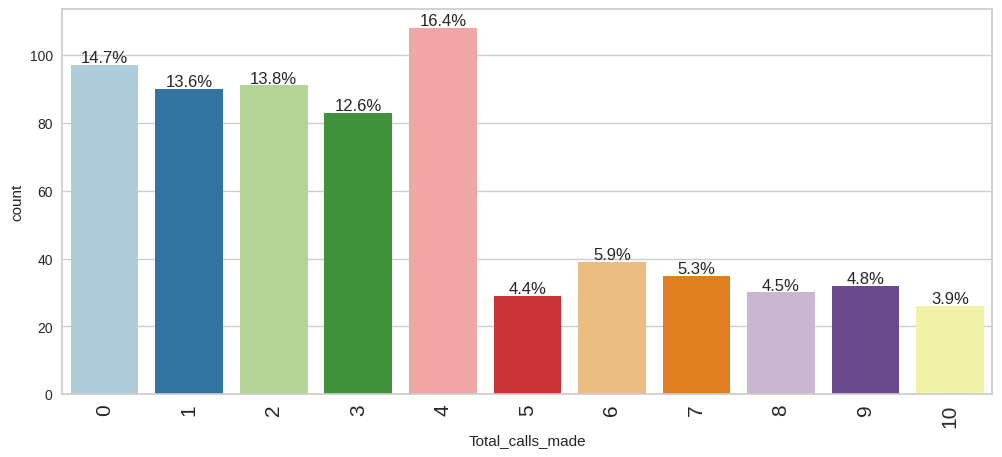

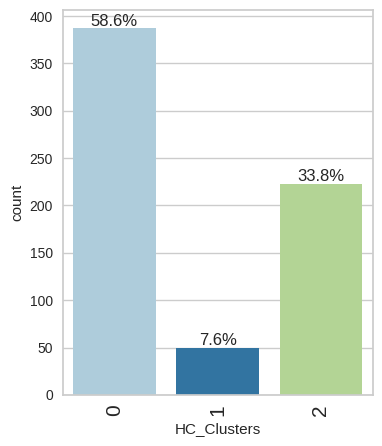

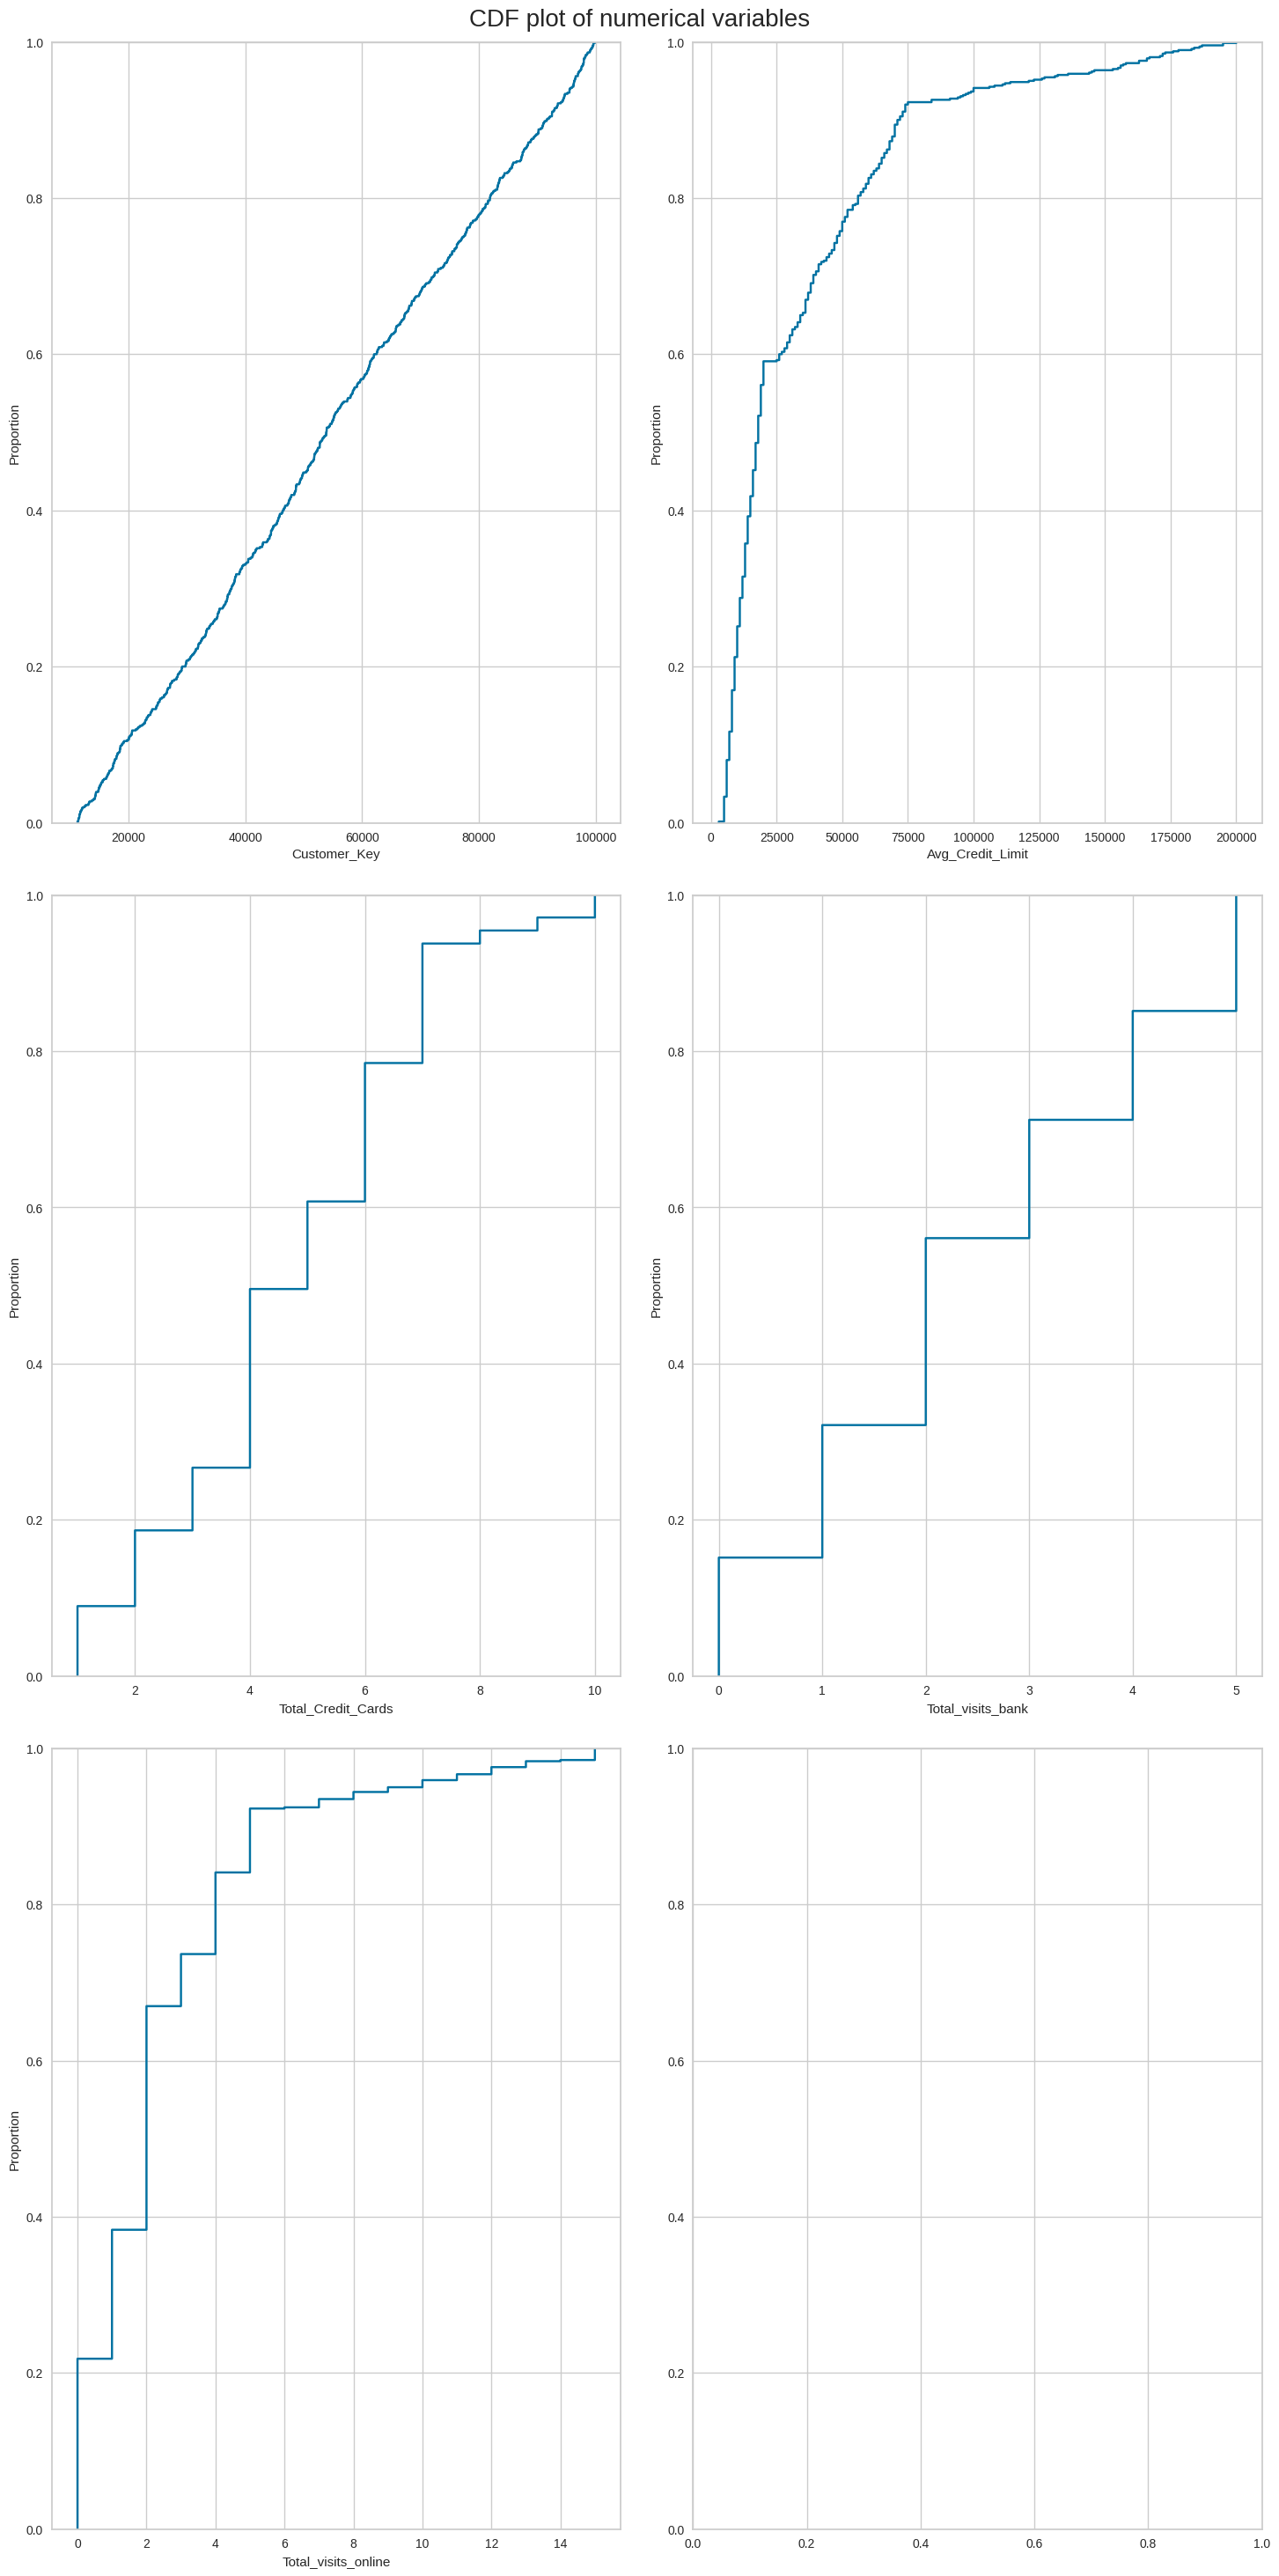

In [103]:
for col in df.columns:
    histogram_boxplot(df, col)

for col in df.columns.tolist()[1:]:
    labeled_barplot(df, col, perc=True)

fig, axes = plt.subplots(3, 2, figsize=(15, 30))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=df, ax=axes[ii][0], x=df.columns.tolist()[counter])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(data=df, ax=axes[ii][1], x=df.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**

- Avg Credit limit is heavily right skewed
- Avg Credit limit has lot of outliers
- Customer visits online also has outliers

- Majority of customers have 4 credit cards and then 6 and 7 credit cards. Very few have >=8 cards
- ~160 customers visited bank twice
- Majority of customers have visited bank online twice
- Majority of visits by most of the customers are <=5
- Majority of customers made <=4 calls to the bank
- A good chunk of customers hve not visited the bank, or went online or have made calls

### Bivariate Analysis

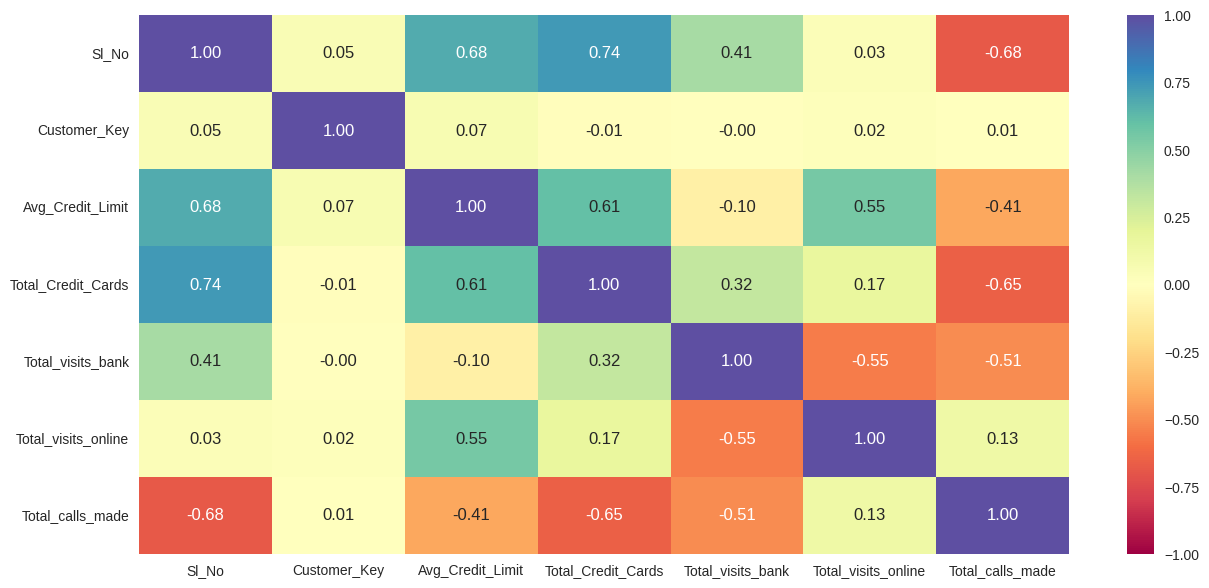

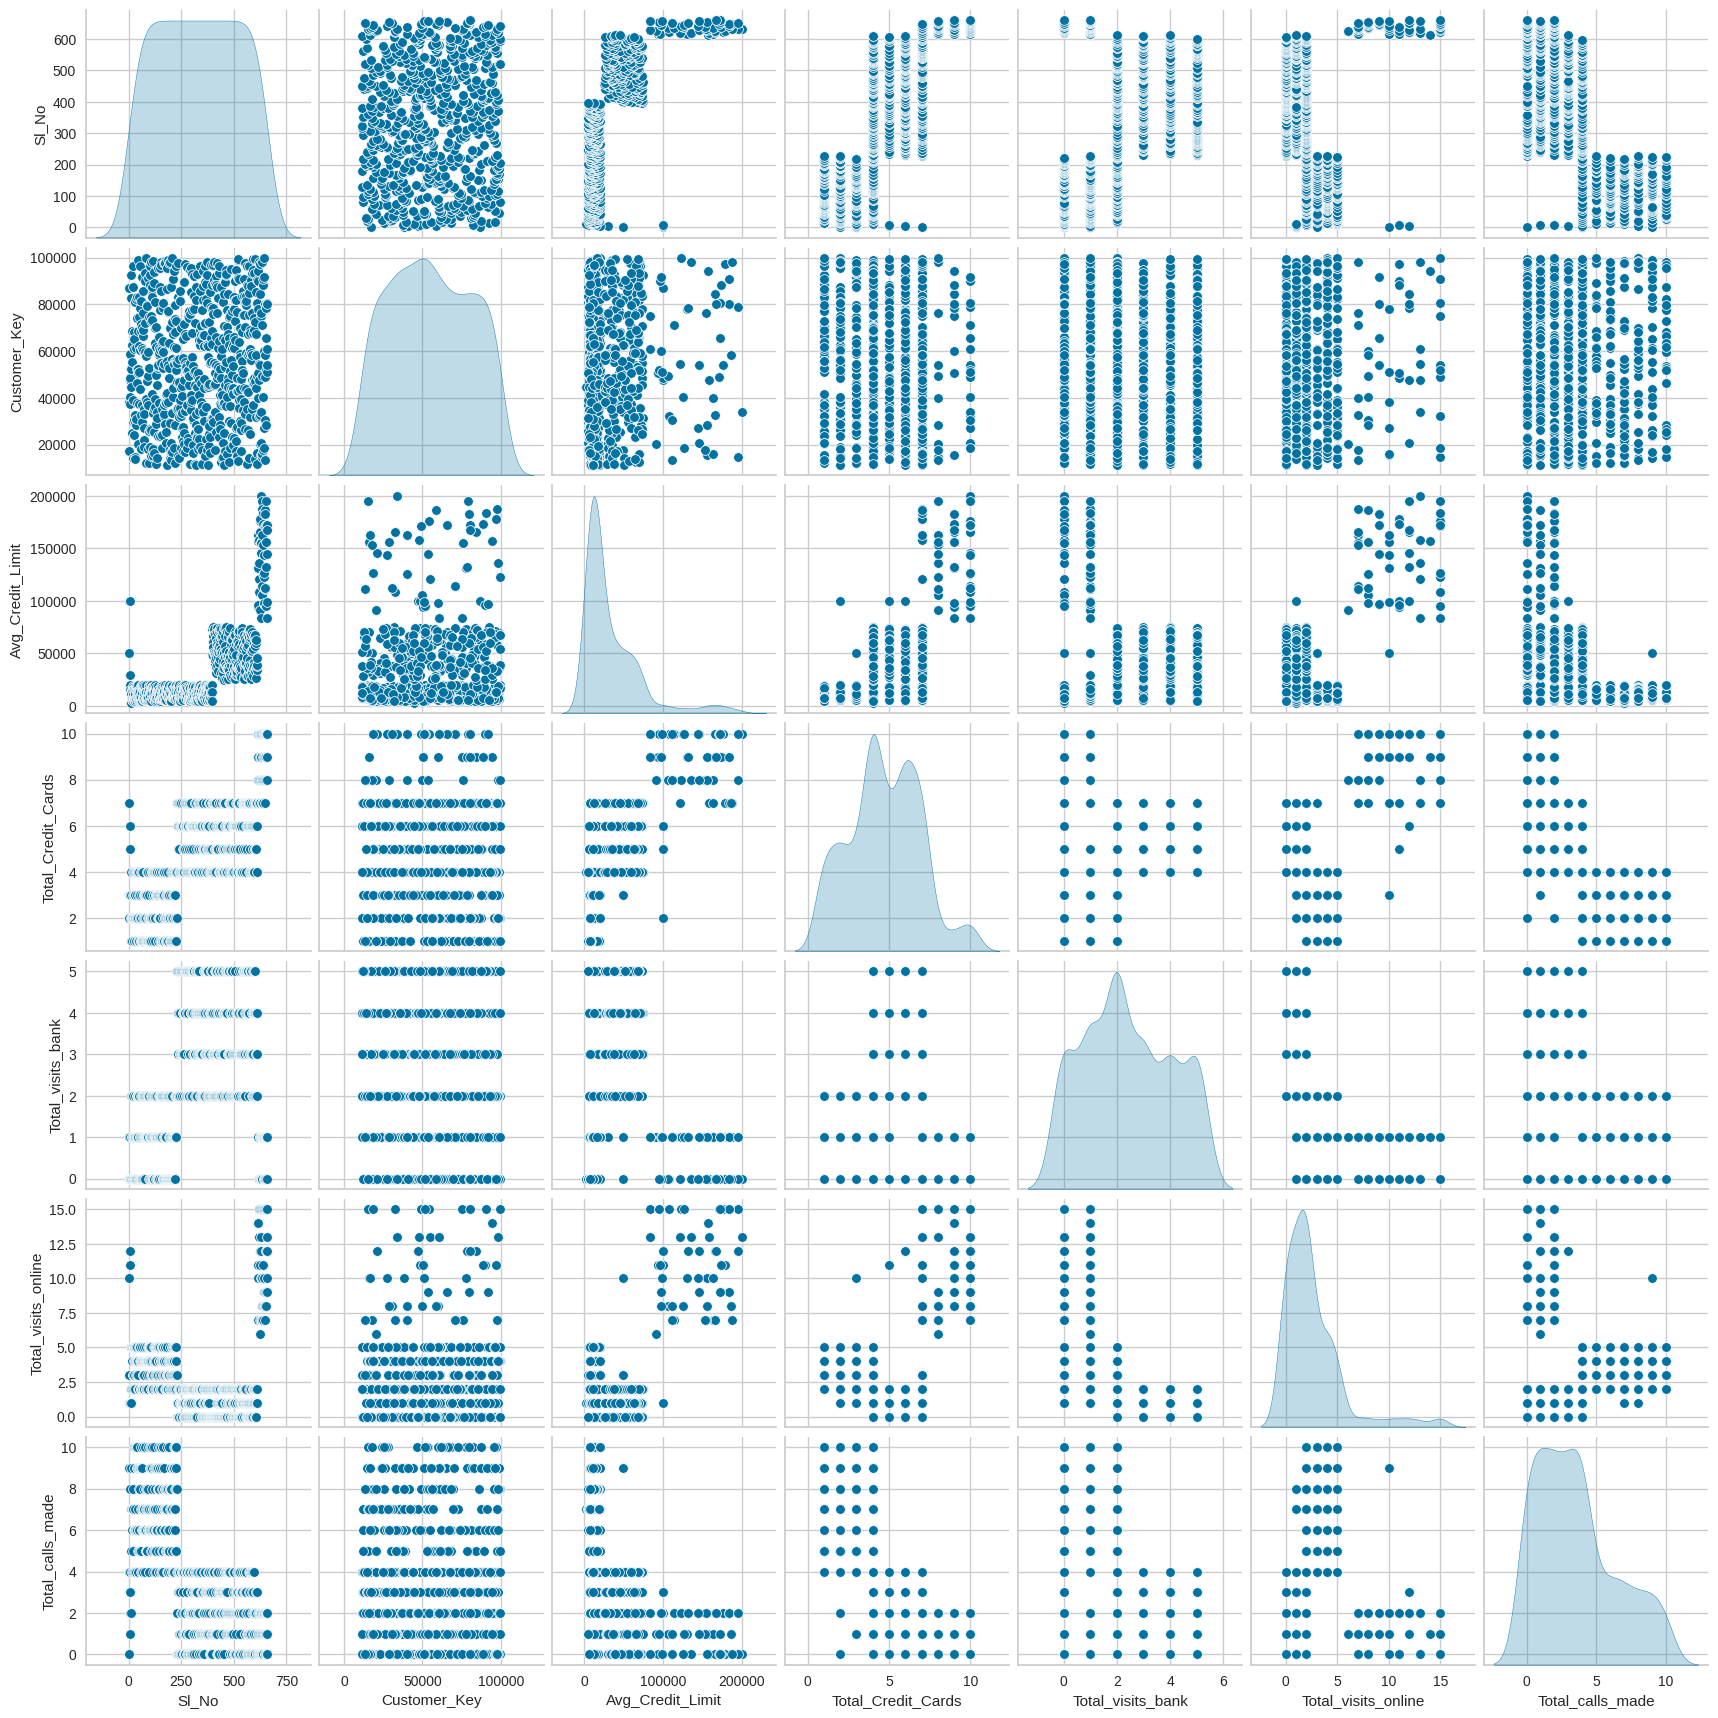

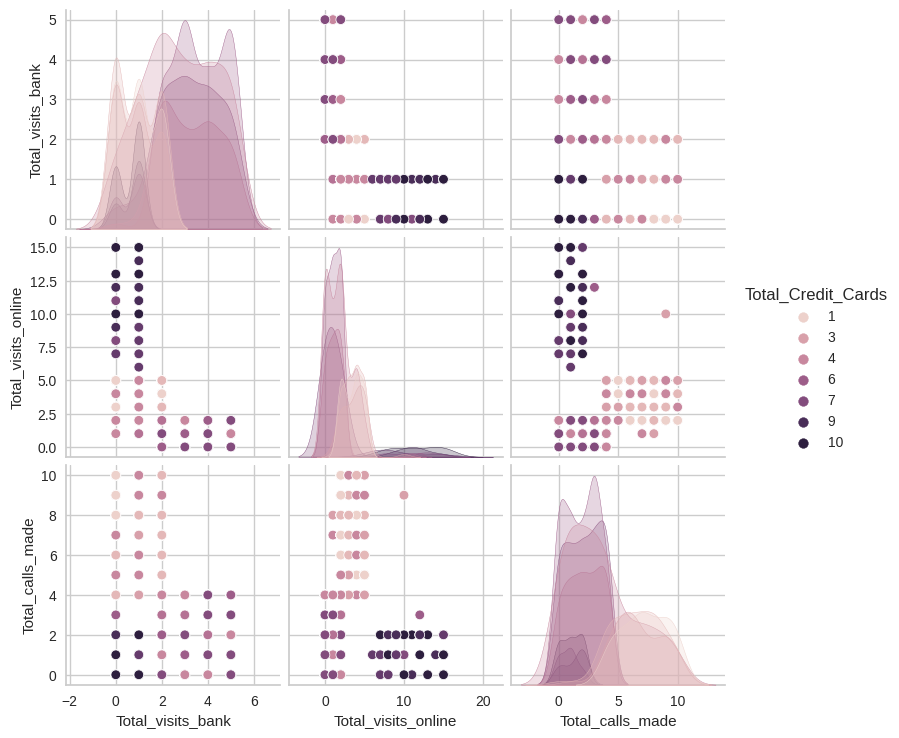

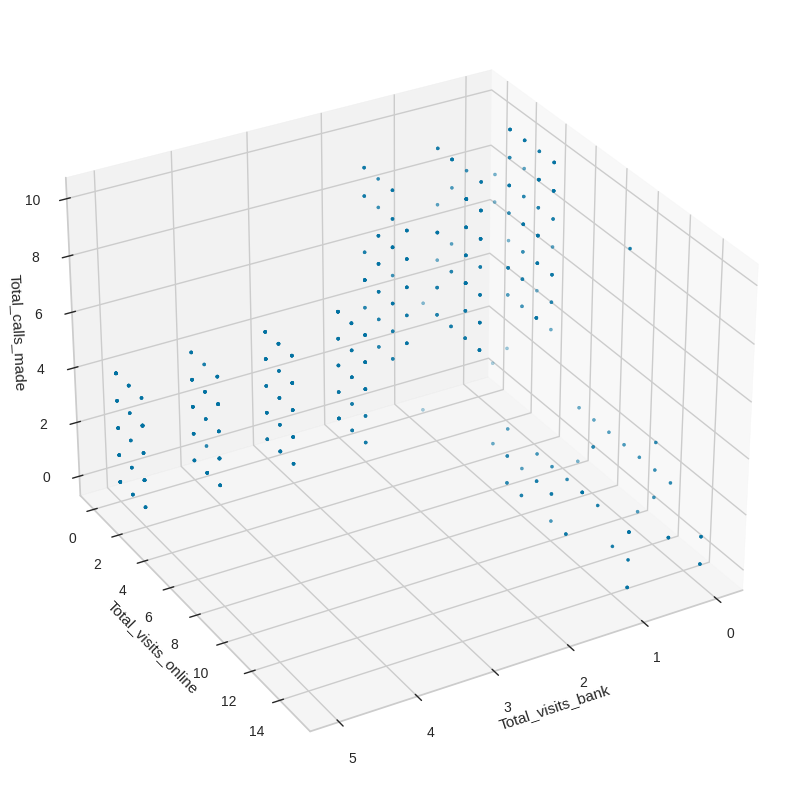

In [66]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

sns.pairplot(data=df, diag_kind="kde")
plt.show()

sns.pairplot(
    data=df[
        [
            "Total_visits_bank",
            "Total_visits_online",
            "Total_calls_made",
            "Total_Credit_Cards",
        ]
    ],
    hue="Total_Credit_Cards",
)

plt.show()


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["Total_visits_bank"]
y = df["Total_visits_online"]
z = df["Total_calls_made"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("Total_visits_bank")
ax.set_ylabel("Total_visits_online")
ax.set_zlabel("Total_calls_made")
ax.view_init(azim=60)
plt.show()

### EDA Observation Questions & Responses

1. **How is the distribution of average credit limit of customer ?**
   >> Average Credit Limit distribution is heavily right-skewed
2. **What percentage of the customers have never made a service-related call to the bank?**
   >> 14.7% of customers have never made a service-related call to the bank
3. **What percentage of customers have never logged in to the online portal?**
   >> 21.8% of customers have never logged in to the online portal
4. **How many customers have never visited a bank?**
   >> 15.2% of customers have never visited the bank
5. **How are the different variables correlated with each other?**
   >> - Credit cards and visit online have +ve relationship
   - Credit limits and visit online have +ve relationship
   - Visit bank and visit online have -ve relationship
   - Visit to bank and calls made have -ve relationship
   - More or less of -ve relationship between credit limit and calls made; credit limits and visit to bank; credit cards and calls made  
      
Finally, we can see
- 2 clusters between credit limit and credit cards
- 2 clusters between credit limit and visit online
- 2 clusters between total visits online and credit cards
- 3 clusters between total visits online and calls made -

## Data Preprocessing



- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Checking for duplicates values

In [67]:
# getting the count for each unique value in Customer_Key
data_grouped = df.groupby("Customer_Key").count()

for i in data_grouped.loc[data_grouped.Sl_No >= 2].index:
    display(data.loc[df.Customer_Key == i])

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


**There are duplicate values in the data for Customer_Key. However this data records were not deleted as event though the customer_key is repeated, this may be a valid data on customer**

**However, the Sl_No column is merely an running # identifier and do not provide any value hence is discarded below**

In [68]:
df.drop(columns=["Sl_No"], inplace=True)
#df.drop(columns=["Customer_Key"], inplace=True)

### Outlier Detecttion

In [69]:
threshold = 2.5 # Lets use the value of the threshold as 2.5
outlier = {}
for col in df.columns:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Customer_Key : []

 Avg_Credit_Limit : [131000, 132000, 136000, 144000, 145000, 146000, 153000, 155000, 156000, 156000, 157000, 158000, 163000, 163000, 166000, 166000, 167000, 171000, 172000, 172000, 173000, 176000, 178000, 183000, 184000, 186000, 187000, 195000, 195000, 200000]

 Total_Credit_Cards : []

 Total_visits_bank : []

 Total_visits_online : [10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

 Total_calls_made : []


**As evident from above and from the box plots in EDA, Avg_Credit_Limit and Total_Visits_online have several outliers**

### Scaling

- Let's scale the data before we proceed with clustering.

In [70]:
# scaling the data before clustering
scaler = StandardScaler()

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

subset = df[num_col].copy()  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)

# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

#### Selecting k using Elbow Plot

In [71]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 2 	Average Distortion: 2700.9848113806484
Number of Clusters: 3 	Average Distortion: 1592.813325379597
Number of Clusters: 4 	Average Distortion: 1309.5101821443152
Number of Clusters: 5 	Average Distortion: 1139.452938183989
Number of Clusters: 6 	Average Distortion: 1051.1331585063076
Number of Clusters: 7 	Average Distortion: 986.6662221423315
Number of Clusters: 8 	Average Distortion: 940.3036209944809
Number of Clusters: 9 	Average Distortion: 892.3679531795486
Number of Clusters: 10 	Average Distortion: 859.6909761538864


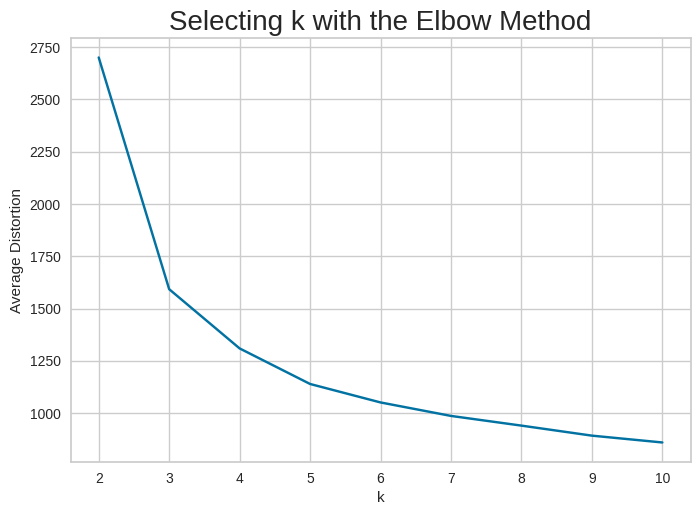

In [72]:
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = sum(
        np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1) ** 2)

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

- From the above graph of "Elbow Method", we can find the possible number of clusters.
- From the graph, we can see the elbow bend at 3.
- We can choose K=3 or K=4
- We can decide K based on Silhouette score

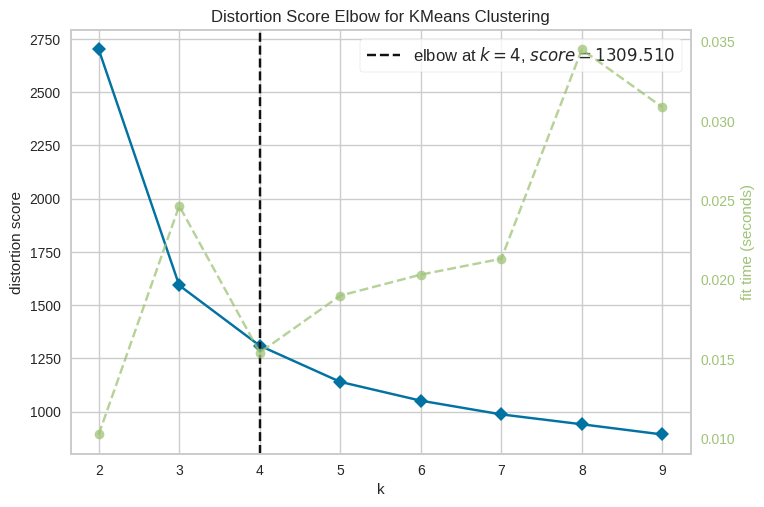

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

In [74]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.33817196365464486)
For n_clusters = 3, the silhouette score is 0.4177434852377372)
For n_clusters = 4, the silhouette score is 0.3228907072652812)
For n_clusters = 5, the silhouette score is 0.2850863954249504)
For n_clusters = 6, the silhouette score is 0.25422115827085306)
For n_clusters = 7, the silhouette score is 0.23773673231415773)
For n_clusters = 8, the silhouette score is 0.2250833601258058)
For n_clusters = 9, the silhouette score is 0.20656573198045716)


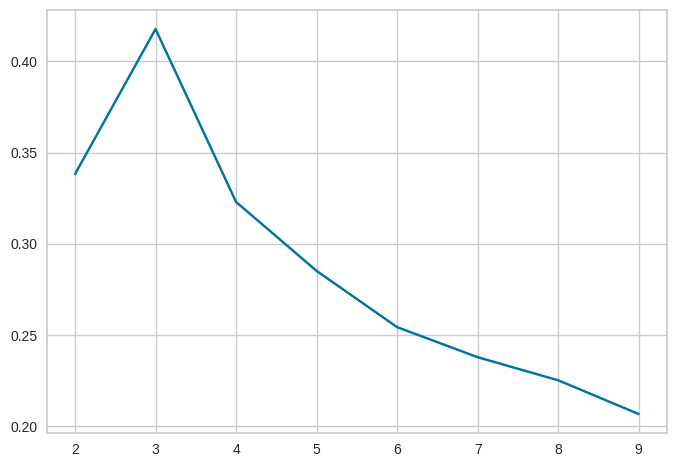

In [75]:
plt.plot(cluster_list, sil_score)
plt.show()

- The Silhouette score visualization above confirms that k = 3 is a very good choice, depicts that k = 4 is not that good as it has a lower silhoutte score.-  Also the score continues to drop further for k = 6,7, 8,9
- At K=3, we have a Sil.Score of 0.515
- We will take K=3

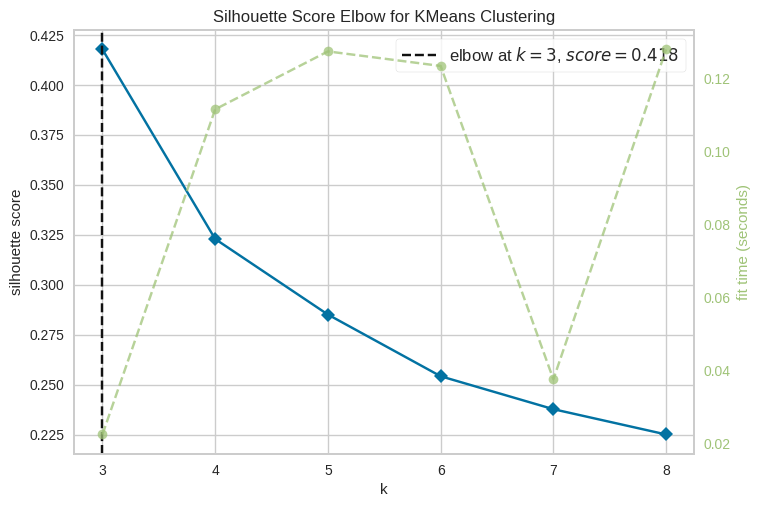

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [76]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(3, 9), metric="silhouette", timings=True) ##  visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

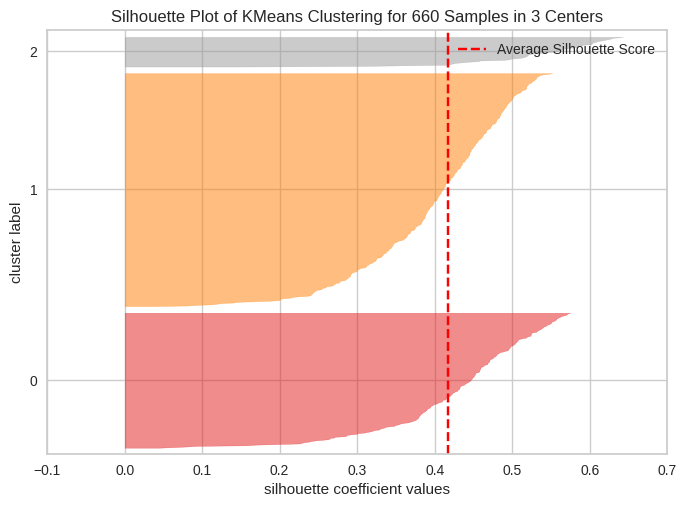

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [77]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  ##  visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

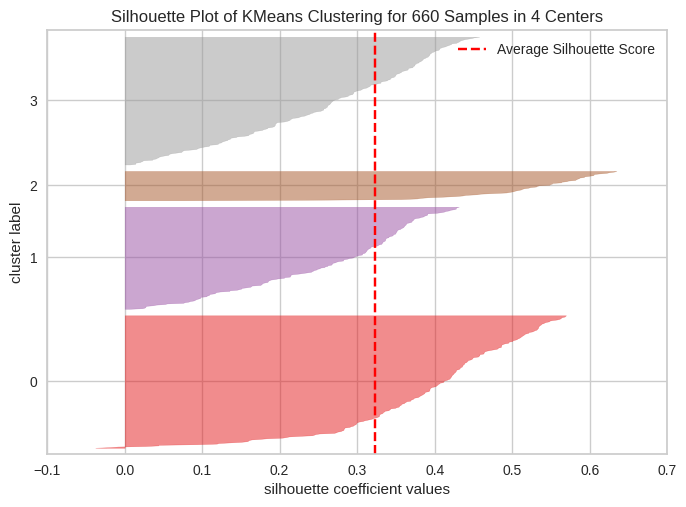

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [78]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

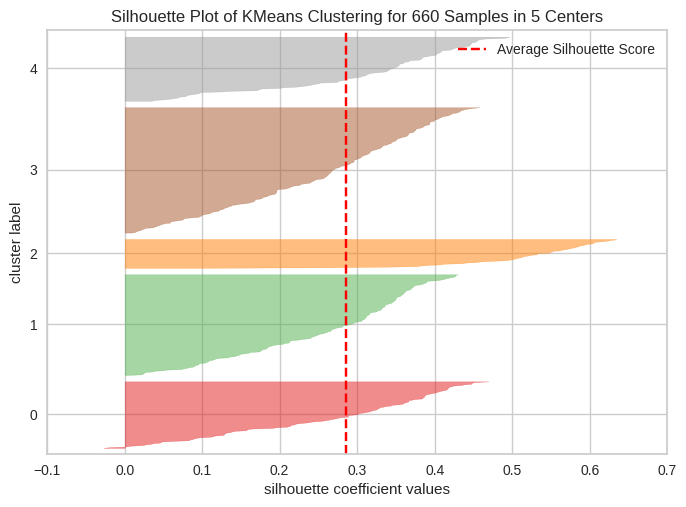

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

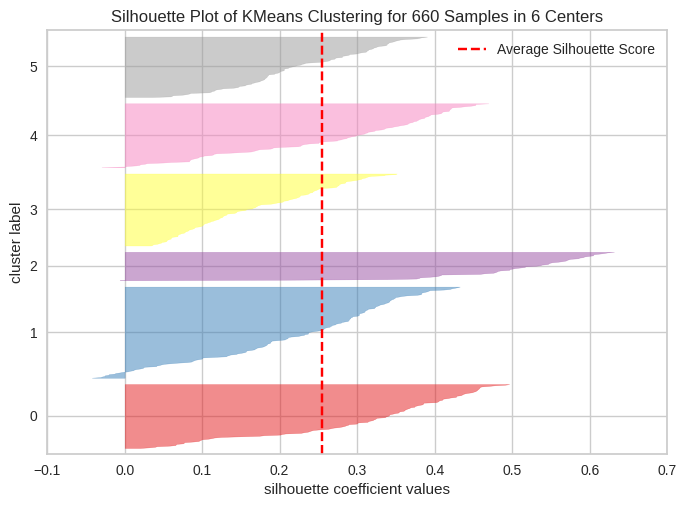

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [80]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

*The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is not good as lower sol score means points are closer to other clusters and there is overlap.*

Based on the above charts,
- When k = 3, the clusters look good: most instances extend beyond the dashed line, to the right and get closer to 1.0

### Creating Final Model

In [81]:
%%time
kmeans = KMeans(n_clusters=3, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

CPU times: user 34.8 ms, sys: 5.87 ms, total: 40.7 ms
Wall time: 28.4 ms


### Cluster Profiling and Comparison

In [82]:
cluster_profile = df1.groupby("K_means_segments").mean()

In [83]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("K_means_segments")["Total_visits_bank"].count().values
)

In [84]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,,
0,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50


**Based on the above we see that**
- Cluster 0 has 224 customers (~34%)
- Cluster 1 has 386 customers (~58%)
- Cluster 2 has 50 customers  (~8%)

**Cluster 0:** Customers with low credit limit, fewer credit cards, medium bank visits, medium online visits and highest calls to bank

**Cluster 1:** Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank

**Cluster 2:** It includes cutomers with highest Avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank

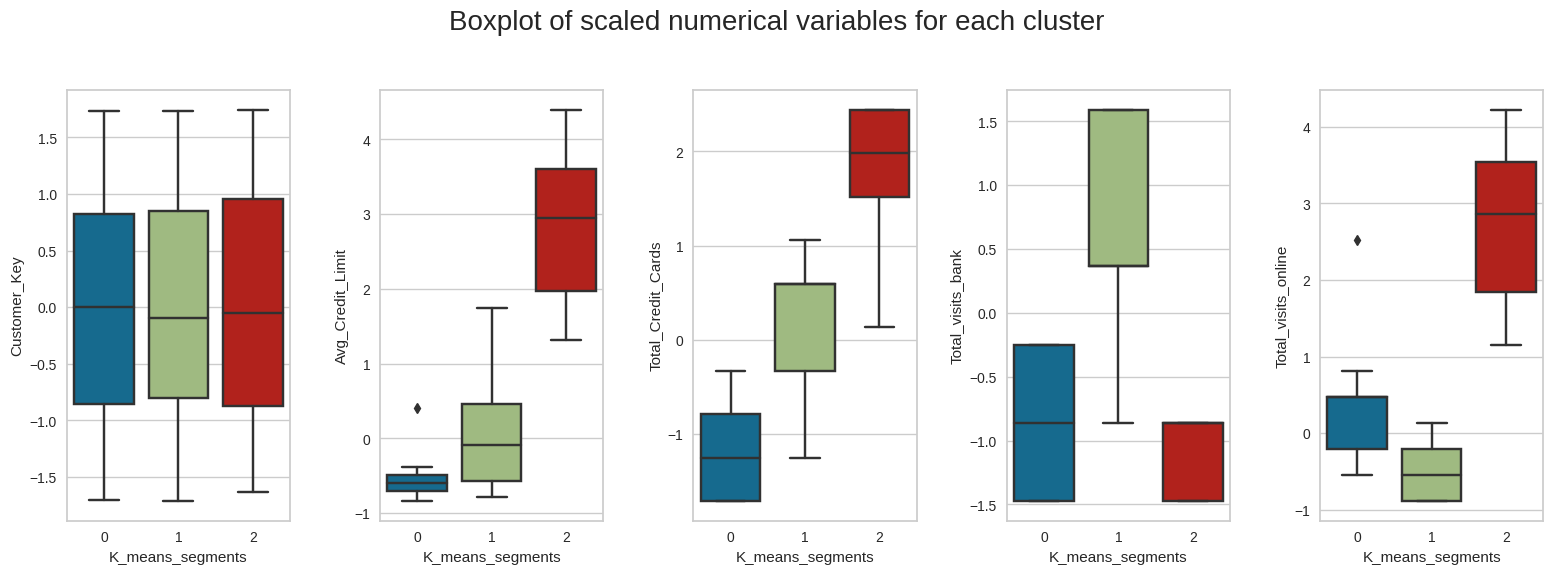

In [85]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=k_means_df[num_col[counter]],
        x=k_means_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

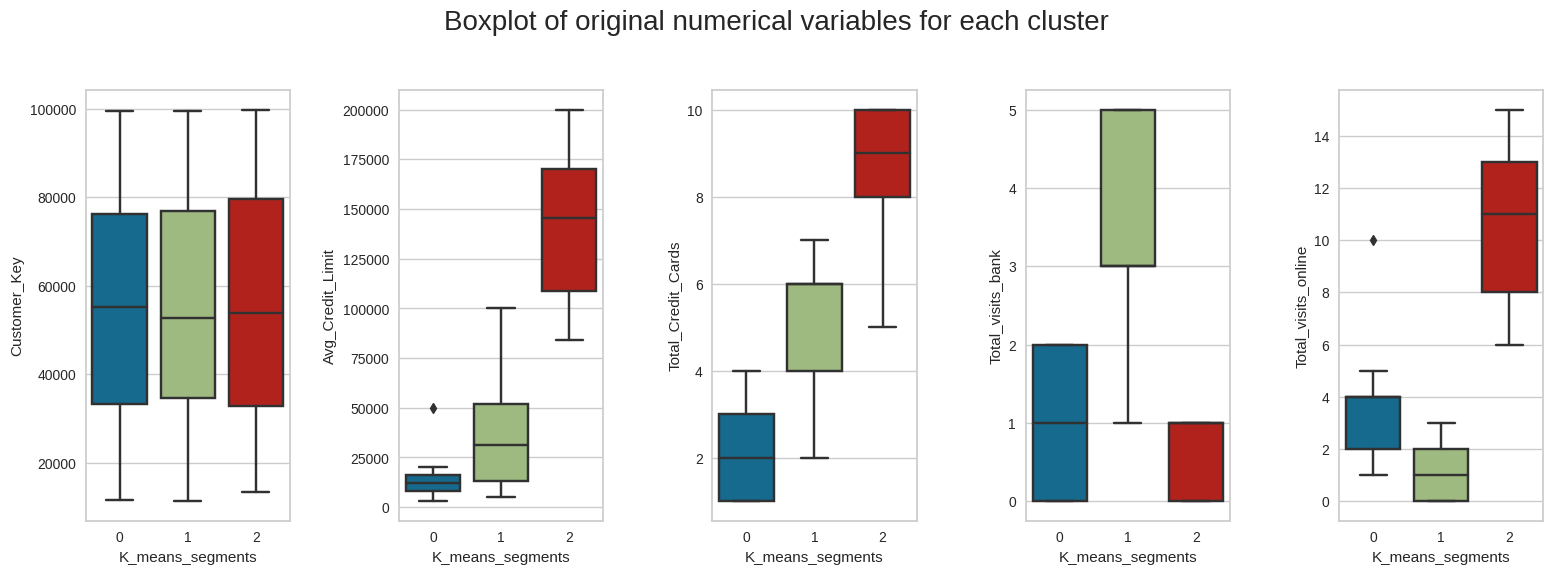

In [86]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df1["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [87]:
hc_df = subset_scaled_df.copy()

In [88]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.715826147503084.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8333358686900459.
Cophenetic correlation for Euclidean distance and average linkage is 0.8684228720933057.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8642251666438747.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6993328509872334.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7832281429250633.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8628342866871905.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8345913036690694.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6829750720107938.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6051316784974626.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7754307051655686.
Cophenetic cor

In [89]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8684228720933057, which is obtained with Euclidean distance and average linkage.


In [90]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.715826147503084.
Cophenetic correlation for complete linkage is 0.8333358686900459.
Cophenetic correlation for average linkage is 0.8684228720933057.
Cophenetic correlation for centroid linkage is 0.8656427328161594.
Cophenetic correlation for ward linkage is 0.7067190998109724.
Cophenetic correlation for weighted linkage is 0.8642251666438747.


In [91]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print()
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.8684228720933057, which is obtained with average linkage.


### Checking Dendrograms

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**


**Let's view the dendrograms for Euclidean distance and the different linkage methods.**

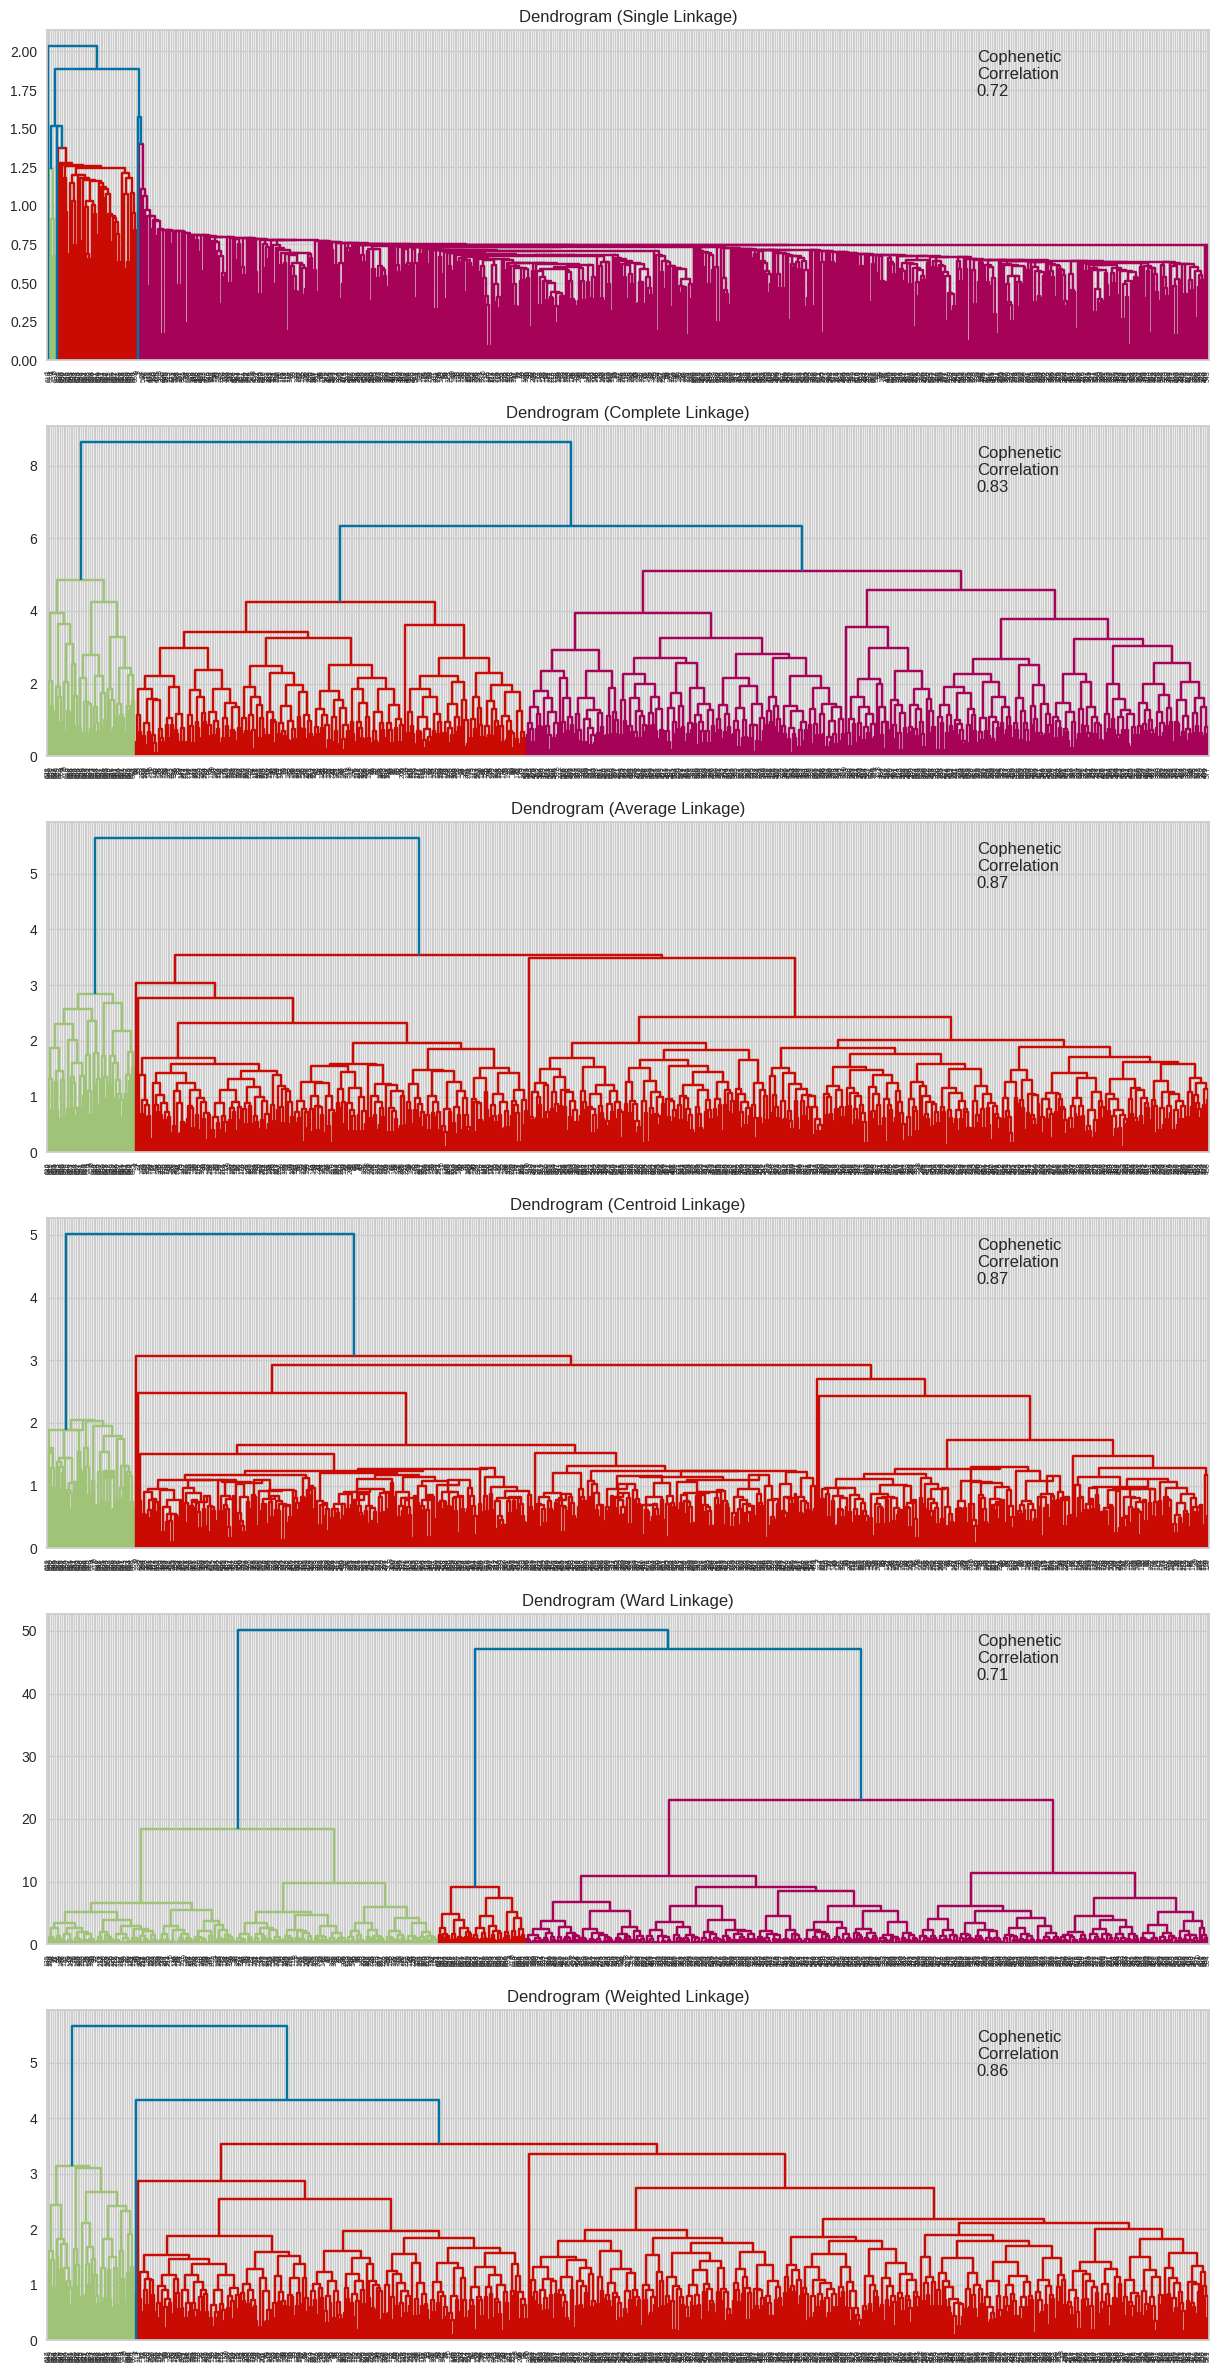

In [92]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Dendrogram with average linkage shows distinct and separate cluster tree.**

In [93]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.706719
0,single,0.715826
1,complete,0.833336
5,weighted,0.864225
3,centroid,0.865643
2,average,0.868423


From the dendograms inference is as below

- single, average, complete and ward linkage are suggesting for 3 to 4 clusters
-  weighted and centroid linkage are suggesting for 6 or 7 clusters

**So we will go ahead with 3 clusters, euclidean distance and average linkage**

### Creating Final Model

In [94]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

CPU times: user 12.4 ms, sys: 0 ns, total: 12.4 ms
Wall time: 12.4 ms


In [95]:
hc_df.head()

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


In [96]:
df2.head()

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
0,87073,100000,2,1,1,0,0
1,38414,50000,3,0,10,9,2
2,17341,50000,7,1,3,4,0
3,40496,30000,5,1,1,4,0
4,47437,100000,6,0,12,3,1


In [97]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling and Analysis

In [98]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [99]:
hc_cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_segments")["Total_visits_bank"].count().values
)

In [100]:
# let's display cluster profiles
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_segments,,,,,,,
0,54874.821705,33736.434109,5.511628,3.485788,0.987080,2.005168,387
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,55252.730942,12156.950673,2.403587,0.928251,3.556054,6.883408,223


**Based on the above we see that**
- Cluster 0 has 387 customers (~58%)
- Cluster 1 has 50 customers (~8%)
- Cluster 2 has 223 customers  (~34%)

**Cluster 0:** Customers with highest Avg credit limit, medium number of credit cards, highest bank visits, low online activity and medium calls to bank. This customer group is less willing to visit online. They prefer more visit physically and they are the biggest number of customer category.

**Cluster 1:** Customers with medium credit limit ,highest number of credit cards (8+), low bank visits and very high online visits and made fewer calls calls to bank.This category of customers have higher number of credit cards and they make a lot of online visit and very relucatanct to go physically and make call over telephone

**Cluster 2:** Customers with medium-low Avg credit limit, medium number of credit cards, very less bank visits, medium online visits and higher calls made to bank. These are 2nd biggest category of customers

## K-means vs Hierarchical Clustering

In [101]:
# let's see the customer key in each cluster with Hierarchical clustering

for cl in df2["HC_segments"].unique():
     print(
        "The",
       df2[df2["HC_segments"] == cl]["Customer_Key"].nunique(),
        "customer in cluster",
        cl,
       "are:",
     )
     print(df2[df2["HC_segments"] == cl]["Customer_Key"].unique())
     print("-" * 100, "\n")


# let's see the customer key in each cluster with KMeans clustering

for cl in df1["K_means_segments"].unique():
     print(
       "The",
        df1[df1["K_means_segments"] == cl]["Customer_Key"].nunique(),
        "customer in cluster",
        cl,
        "are:",
     )
     print(df1[df1["K_means_segments"] == cl]["Customer_Key"].unique())
     print("-" * 100, "\n")



The 385 customer in cluster 0 are:
[87073 17341 40496 52363 54838 35254 46635 97825 83125 35483 15129 83290
 56486 31903 45909 14263 46813 81878 35549 85799 39122 81531 69965 18595
 44398 32352 40898 27101 33457 45088 23302 27408 65372 21531 56843 17165
 89328 20072 71402 47496 24808 17036 67193 34423 97109 55382 51811 53936
 66504 53207 18514 51319 36340 36934 95925 49771 22919 21233 74544 52025
 45652 73952 49418 77026 49331 75775 54906 94666 11698 34677 95610 41380
 38033 85337 38994 67911 92956 77641 57565 53814 30712 19785 31384 16374
 50878 78002 83459 91987 51552 24998 45673 11596 87485 28414 81863 33240
 11466 23881 44645 49844 92782 22824 26767 26678 50412 17933 34495 47437
 22610 41159 64672 62483 85614 96548 19137 69028 70779 38244 67046 64897
 46223 36628 17565 77381 11799 81940 66706 87838 94437 33790 44402 29886
 66804 47866 61996 15318 89635 71681 71862 96186 22348 36243 88807 82376
 98126 80347 17649 62807 92522 57459 44579 45476 61994 11398 24702 27824
 45878 72431 192

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

**Observations**

- *Execution Times:*
  - KMeans Clustering - 62.9 ms total time
  - Hierarchical Clustering - 19.8 ms total time

  - As the number of sample size in this case small, Hierarchical clustering is manageble and also executed more quicker compared to KMeans. However, in case of very large sample size, it would create more complexity and will typically take much longer times and is expensive

- Both clustering methods have produced almost similar kind of insights with cluster number = 3
- Only one customer has moved to another segment, if we compare clustering profile from two methods
- Cluster with 50 customers remained exactlhy same with same set of customers in both algorithms


## Actionable Insights and Recommendations

***Key Questions:***

**How many different segments of customers are there?**
>> There are essentially 3 distinct categories of customers based on average credit limit and their mode of communication with bank

**How are these segments different from each other?**
>> These segments mainly differ based on credit limits as below.
  - *High Credit Limit preference of online bank*
    - Customers who have high credit limit have more number of credit cards and they prefer to bank online rather visiting the bank or calling bank
  - *Medium Credit Limit preference of bank visits*
    - Customers with medium credit limit have more credit cards when compared to low credit customers and have less calls made to bank as compared to low credit customers but have more visits to bank overall
  - Low Credit Limit preference of calling bank
    - Customers who have low credit limit have less number of credit cards and have more calls made to the bank


**What are your recommendations to the bank on how to better market to and service these customers?**
>> - Bank should target the customers and develop their marketing strategy according to their choice based on their interaction preference.
  - The smallest cluster of customer is the most affluent. These customers with high credit limit tend to vist online. Hence they can be targeted for online campaigns, online discounts and accordingly products and services can be offered to them
  - The biggest category of customers are with comparatively low credit limit make visits to bank more often, hence they can either be prompted with benefits of online banking or can be catered with in-bank offers/services and flyers
  - The second largest cluster of customers are the customers with low credit limits and they are less frequent on online platforms. For these customers, the bank should focus on more on improvement in a call center, less waiting time etc. Customer call center representatives can be trained to offers promotions to target these customers who call in. They can also be marketed with the benefits of online banking to slowly reduce call volumes, if needed

___

In [105]:
%%shell
jupyter nbconvert --to html /content/Full_Code_AIML_USL_Project_CreditCardCustomerSegmentation.ipynb

[NbConvertApp] Converting notebook /content/Full_Code_AIML_USL_Project_CreditCardCustomerSegmentation.ipynb to html
[NbConvertApp] Writing 4054718 bytes to /content/Full_Code_AIML_USL_Project_CreditCardCustomerSegmentation.html
